## 作业1：跳伞运动员仿真
   一名高空跳伞运动员从飞机上跳下，能够确定海拔高度和运动员自由下落的速度吗？在上一个实例中，炮弹总是保持$500m/s$的水平初速度（知道落入海中）。实际情况下，空气的摩擦阻力将使炮弹减速。同样，作用在运动员身上的重力同样受到空气摩擦力的影响，并随着运动员速度的增加而变大。最终，这一阻力将导致向上的摩擦力与向下的重力平衡，使合外力为零。在这一点，运动员将不再加速并保持稳态速度。
    根据基本空气动力学理论，运动员所受阻力由下式表示：
$$drag={1\over2}\rho v^2SC_d$$
式中，$\rho$为空气密度，$v$为速度，$S$为表面积，$C_d$为阻力系数。
    该公式的计算显然比较复杂。首先，空气密度$\rho$随着海拔高度而变化；第二，总阻力随着速度的平方变化；第三，运动员的表面积随着其运动而变化；最后，阻力系数取决于运动员伞具采用材料的摩擦力系数。这四个变量都是非线性的，因此很难推导出这个公式的显式解。
    为简化这个问题，假设$\rho=1.225kg/m^3$，$S=1.0m^2$，$C_d=0.05$，因此仅有$v$为非线性项。使用Euler法模拟整个运动过程，而不是直接求解公式。
    改变伞打开的时间，观察跳伞运动员的运动状态变化。

In [128]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [129]:
m=UNITS.meter
s=UNITS.second
kg=UNITS.kilogram
N=UNITS.newton

g=9.81*m/s**2

init_z=State(y=3000.0*m,v=0.0*m/s)

M=85.0*kg
t_end=30*s
dt=0.01*s
Rho=1.225*kg/m**3
S=1.0*m**2
Cd=0.05
H_kai=2500*m

2500 <Unit('meter')>

In [130]:
def accel(v,y):
    if y>H_kai:
        accel=-g
    else:
        drag=0.5*Rho*v*v*Cd*S
        accel=drag/M-g
    return accel

In [131]:
system_z=System(init=init_z,g=g,t_end=t_end,dt=dt)

def slope_func_z(state,t,system):
    y,v=state
    dydt=v
    dvdt=accel(v,y)
    return dydt,dvdt

Vz,Az=slope_func_z(system_z.init, 0,system_z)
result_z,details_z=run_euler(system_z,slope_func_z)

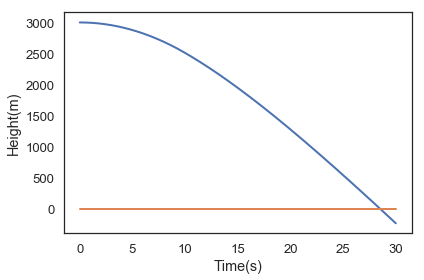

In [132]:
plot(result_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,5,10,15,20,25,30]
y=[0,0,0,0,0,0,0]

plot(x,y)

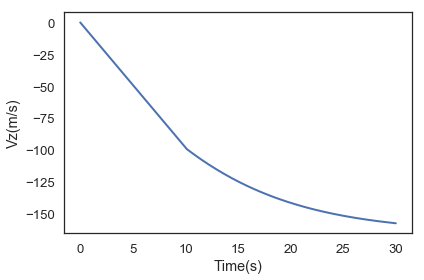

In [133]:
plot(result_z.v)
decorate(xlabel='Time(s)',
         ylabel='Vz(m/s)')